In [2]:
#start with importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold

#read in your data

schdf = pd.read_csv("Downloads/school.csv/school.csv")

#This data was found on Kaggle: https://www.kaggle.com/mchirico/pennsylvania-safe-schools-report
#The original full data is located on the Pennsylvania Safe Schools website here:
#https://www.safeschools.pa.gov/Main.aspx?App=6a935f44-7cbf-45e1-850b-e29b2f1ff17f&Menu=dbd39a1f-3319-4a75-8f69-d1166dba5d70&res=

In [3]:
#Let's take a look at the first row of each of our variables to get a good idea of what we're working with
schdf.iloc[0,:]

AUNbr                                                               1.20481e+08
Academic Expulsion                                                            0
Academic OSS                                                                  0
Aggravated Indecent Assault                                                   0
Arson                                                                         0
Assaults on Staff                                                           NaN
Assaults on Students                                                        NaN
Assignments to Alternative Education                                          0
Attempt or Commission of Murder/Manslaughter                                  0
Attempted                                                                     0
BB/Pellet Gun                                                                 0
Bomb Threats                                                                  0
Bullying                                

In [4]:
#first few rows now...
schdf.head()

,AUNbr,Academic Expulsion,Academic OSS,Aggravated Indecent Assault,Arson,Assaults on Staff,Assaults on Students,Assignments to Alternative Education,Attempt or Commission of Murder/Manslaughter,Attempted,...,Tobacco OSS,Total Arrests,Truancy Rate,Unlawful Restraint,Vandalism,Violence Expulsion,Violence OSS,Weapon Expulsion,Weapon OSS,Year
0,120481107.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0.0,...,3.0,4,0.0000,NaN,0.0,0.0,14.0,0.0,2.0,2013
1,110171607.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0.0,...,2.0,0,0.0000,NaN,0.0,0.0,0.0,0.0,0.0,2013
2,106161357.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0.0,...,0.0,0,0.0000,NaN,0.0,0.0,1.0,0.0,0.0,2013
3,116191757.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0.0,...,2.0,31,0.1152,NaN,0.0,0.0,12.0,2.0,0.0,2013
4,101266007.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0.0,...,0.0,0,0.1417,NaN,0.0,0.0,3.0,0.0,0.0,2013


In [5]:
#Narrow it down to the variables that we are interested in
schdf = schdf[['Year','School Name','Bullying','Academic Expulsion','Conduct Expulsion','Enrollment','Explosive','Handgun','Other Firearm','Possession of a Knife','Racial/Ethnic Intimidation','Rifle/Shotgun','Tobacco Expulsion','Truancy Rate','Violence Expulsion','Weapon Expulsion']]

In [6]:
#Let's take a look at that first row with the new dataset
schdf.iloc[0,:]

Year                                    2013
School Name                   Bethlehem AVTS
Bullying                                   0
Academic Expulsion                         0
Conduct Expulsion                          0
Enrollment                              1315
Explosive                                  1
Handgun                                    0
Other Firearm                              0
Possession of a Knife                      0
Racial/Ethnic Intimidation                 0
Rifle/Shotgun                              0
Tobacco Expulsion                          0
Truancy Rate                               0
Violence Expulsion                         0
Weapon Expulsion                           0
Name: 0, dtype: object

In [7]:
#First few rows again...
schdf.head()

,Year,School Name,Bullying,Academic Expulsion,Conduct Expulsion,Enrollment,Explosive,Handgun,Other Firearm,Possession of a Knife,Racial/Ethnic Intimidation,Rifle/Shotgun,Tobacco Expulsion,Truancy Rate,Violence Expulsion,Weapon Expulsion
0,2013,Bethlehem AVTS,0.0,0.0,0.0,1315.0,1.0,0.0,0.0,0,0,0.0,0.0,0.0000,0.0,0.0
1,2013,Clearfield County CTC,0.0,0.0,0.0,294.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0000,0.0,0.0
2,2013,Clarion County Career Center,0.0,0.0,0.0,292.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0000,0.0,0.0
3,2013,Columbia-Montour AVTS,4.0,0.0,0.0,625.0,0.0,0.0,0.0,1,0,1.0,0.0,0.1152,0.0,2.0
4,2013,Connellsville Area Career & Technical Ce,0.0,0.0,0.0,240.0,0.0,0.0,0.0,0,0,0.0,0.0,0.1417,0.0,0.0


In [8]:
#Narrow it down further by using data only from 2013 onward
schdf = schdf[schdf['Year']>2012]

In [9]:
#Take a look at any null/blank values in the dataset
schdf.isnull().sum()

Year                             0
School Name                   3156
Bullying                         0
Academic Expulsion               0
Conduct Expulsion                0
Enrollment                       0
Explosive                        0
Handgun                          0
Other Firearm                    0
Possession of a Knife            0
Racial/Ethnic Intimidation       0
Rifle/Shotgun                    0
Tobacco Expulsion                0
Truancy Rate                     0
Violence Expulsion               0
Weapon Expulsion                 0
dtype: int64

In [10]:
#Looking at the background of the data and descriptions, there is a high amount of "School Name" values missing
#since those rows are pertaining to broader categories such as counties and districts
#Let's first take a look at the amount of rows we have...
schdf.shape[0]

18361

In [11]:
#Drop all null/blank values
schdf = schdf.dropna(axis=0)

In [12]:
#take a look at the amount of rows again...
schdf.shape[0]

15205

In [13]:
#Let's see if the null/blank values have been removed
schdf.isnull().sum()

Year                          0
School Name                   0
Bullying                      0
Academic Expulsion            0
Conduct Expulsion             0
Enrollment                    0
Explosive                     0
Handgun                       0
Other Firearm                 0
Possession of a Knife         0
Racial/Ethnic Intimidation    0
Rifle/Shotgun                 0
Tobacco Expulsion             0
Truancy Rate                  0
Violence Expulsion            0
Weapon Expulsion              0
dtype: int64

In [14]:
#Let's take a look at our dataset at a glance...
schdf.describe()

,Year,Bullying,Academic Expulsion,Conduct Expulsion,Enrollment,Explosive,Handgun,Other Firearm,Possession of a Knife,Racial/Ethnic Intimidation,Rifle/Shotgun,Tobacco Expulsion,Truancy Rate,Violence Expulsion,Weapon Expulsion
count,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000
mean,2014.901019,1.031174,0.001578,0.139625,662.153042,0.009405,0.009865,0.005064,0.537060,0.111476,0.001907,0.001250,0.088895,0.119697,0.136600
std,1.449356,6.838139,0.147317,1.677508,1399.578006,0.131686,0.149655,0.089802,2.471654,0.632063,0.043632,0.045137,0.161391,0.943210,0.793343
min,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001100,0.000000,0.000000
50%,2015.000000,0.000000,0.000000,0.000000,502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018700,0.000000,0.000000
75%,2016.000000,0.000000,0.000000,0.000000,701.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.085900,0.000000,0.000000
max,2017.000000,417.000000,18.000000,145.000000,143898.000000,5.000000,7.000000,6.000000,253.000000,26.000000,1.000000,3.000000,1.750000,34.000000,42.000000


In [15]:
#correlation matrix
schdf.corr()

,Year,Bullying,Academic Expulsion,Conduct Expulsion,Enrollment,Explosive,Handgun,Other Firearm,Possession of a Knife,Racial/Ethnic Intimidation,Rifle/Shotgun,Tobacco Expulsion,Truancy Rate,Violence Expulsion,Weapon Expulsion
Year,1.000000,-0.063106,-0.006661,-0.009681,-0.079789,-0.021657,-0.010053,-0.014846,-0.046300,-0.006909,-0.002215,0.000885,0.123159,-0.013849,-0.053278
Bullying,-0.063106,1.000000,-0.000114,0.060955,0.221900,0.062855,0.172266,0.027484,0.224241,0.213261,0.006855,0.008611,0.003181,0.136925,0.258958
Academic Expulsion,-0.006661,-0.000114,1.000000,0.087470,0.000736,-0.000765,-0.000706,-0.000604,0.003271,-0.000477,-0.000468,0.009595,-0.003438,0.001954,0.002094
Conduct Expulsion,-0.009681,0.060955,0.087470,1.000000,0.241392,0.019661,0.088829,0.054685,0.244797,0.029176,0.001753,0.014200,0.025847,0.294345,0.158396
Enrollment,-0.079789,0.221900,0.000736,0.241392,1.000000,0.045893,0.375626,0.092839,0.849744,0.117283,0.014514,0.030576,0.004881,0.305564,0.329571
Explosive,-0.021657,0.062855,-0.000765,0.019661,0.045893,1.000000,0.011979,0.001534,0.057632,0.031655,0.054114,-0.001977,-0.000374,0.034358,0.077101
Handgun,-0.010053,0.172266,-0.000706,0.088829,0.375626,0.011979,1.000000,0.079481,0.414203,0.059992,0.007191,-0.001825,0.055798,0.139807,0.194173
Other Firearm,-0.014846,0.027484,-0.000604,0.054685,0.092839,0.001534,0.079481,1.000000,0.093534,0.053786,-0.002465,-0.001561,0.016937,0.044093,0.083533
Possession of a Knife,-0.046300,0.224241,0.003271,0.244797,0.849744,0.057632,0.414203,0.093534,1.000000,0.119217,0.017336,0.025820,0.074028,0.331065,0.423155
Racial/Ethnic Intimidation,-0.006909,0.213261,-0.000477,0.029176,0.117283,0.031655,0.059992,0.053786,0.119217,1.000000,0.018524,0.006644,-0.016084,0.076799,0.156935


In [16]:
#We're interested in the "Bullying" variable in our dataset
#Let's change the values for "Bullying" into binary classifiers
#Turn anything that is greater than '0' into a '1'
#We can interpret that '1' as meaning "some amount of bullying recorded" vs '0' meaning "no bullying recorded"
schdf[schdf['Bullying'] > 0] = 1

Text(0, 0.5, 'Handgun')

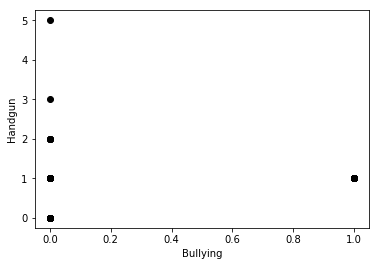

In [17]:
#Let's take a look at some scatter plots
plt.plot(schdf['Bullying'],schdf['Handgun'] , 'o', color='black')
plt.xlabel("Bullying")
plt.ylabel("Handgun")

Text(0, 0.5, 'Weapon Expulsion')

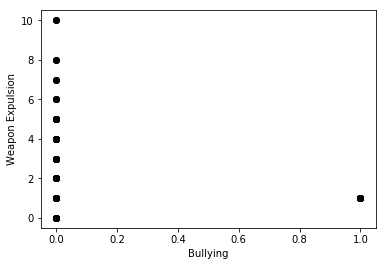

In [18]:
plt.plot(schdf['Bullying'],schdf['Weapon Expulsion'] , 'o', color='black')
plt.xlabel("Bullying")
plt.ylabel("Weapon Expulsion")

Text(0, 0.5, 'Handgun')

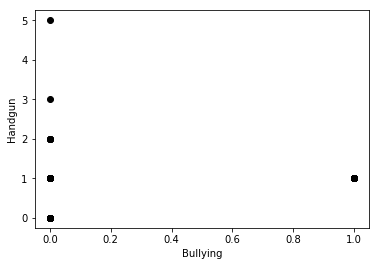

In [19]:
plt.plot(schdf['Bullying'],schdf['Handgun'] , 'o', color='black')
plt.xlabel("Bullying")
plt.ylabel("Handgun")

Text(0, 0.5, 'Possession of a Knife')

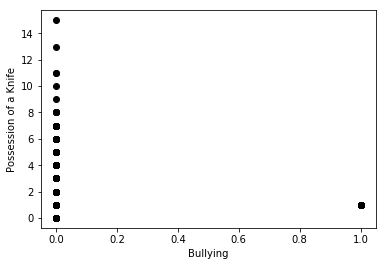

In [20]:
plt.plot(schdf['Bullying'],schdf['Possession of a Knife'] , 'o', color='black')
plt.xlabel("Bullying")
plt.ylabel("Possession of a Knife")

In [21]:
#we are going to fit a linear regression model for the variables we have
#to make it easier, we're going to simplify the variable names...
schdf['Knife'] = schdf['Possession of a Knife']
schdf['Truant'] = schdf['Truancy Rate']
schdf['acexp'] = schdf['Academic Expulsion']
schdf['coexp'] = schdf['Conduct Expulsion']
schdf['fire'] = schdf['Other Firearm']
schdf['ethnicint'] = schdf['Racial/Ethnic Intimidation']
schdf['rifleshot'] = schdf['Rifle/Shotgun']
schdf['toexp'] = schdf['Tobacco Expulsion']
schdf['vioexp'] = schdf['Violence Expulsion']
schdf['weapexp'] = schdf['Weapon Expulsion']

In [22]:
#fit the model with Bullying as the response/dependent variable
reg = smf.ols('Bullying ~ Truant + acexp + coexp + Enrollment + Explosive + Handgun + fire + ethnicint + rifleshot + toexp + vioexp + weapexp + Knife', data=schdf).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bullying   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.937e+05
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:11:48   Log-Likelihood:                 39389.
No. Observations:               15205   AIC:                        -7.875e+04
Df Residuals:                   15191   BIC:                        -7.864e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007      0.000     -2.467      0.014      -0.001      -0.000
Truant         0.0137      0.001     13.454      0.000       0.012       0.016
acexp          0.0155      0.001     15.196      0.000       0.013       0.017
coexp         -0.0008      0.000     -3.579      0.000      -0.001      -0.000
Enrollment -2.182e-06   3.46e-07     -6.305      0.000   -2.86e-06    -1.5e-06
Explosive      0.0535      0.002     29.631      0.000       0.050       0.057
Handgun        0.0501      0.002     27.448      0.000       0.047       0.054
fire           0.1542      0.003     51.939      0.000       0.148       0.160
ethnicint      0.0027      0.001      5.363      0.000       0.002       0.004
rifleshot      0.4593      0.004    114.134      0.000       0.451       0.467
toexp          0.2520      0.004     71.694      0.000       0.245       0.259
vioexp         0.0010      0.000      2.851      0.004       0.000       0.002
weapexp       -0.0008      0.000     -1.885      0.059      -0.002     3.2e-05
Knife         -0.0014      0.000     -6.644      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    33991.959   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        198955478.851
Skew:                         -21.080   Prob(JB):                         0.00
Kurtosis:                     561.802   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#It looks like most of our variables are significant at 0.05 significance level except for weapon expulsion

In [24]:
#statsmodels unfortunately does not have a forward selection function- so I found some comprehensive code for this
#on a blog: https://planspace.org/20150423-forward_selection_with_statsmodels/
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [25]:
#Let's fit the model...
schdf2 = schdf[['Bullying','acexp','coexp','Enrollment','Explosive','Handgun','fire','Knife','ethnicint','rifleshot','toexp','Truant','vioexp','weapexp']]
fwdmodel = forward_selected(schdf2, 'Bullying')
fwdmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bullying   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.937e+05
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:11:52   Log-Likelihood:                 39389.
No. Observations:               15205   AIC:                        -7.875e+04
Df Residuals:                   15191   BIC:                        -7.864e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007      0.000     -2.467      0.014      -0.001      -0.000
rifleshot      0.4593      0.004    114.134      0.000       0.451       0.467
toexp          0.2520      0.004     71.694      0.000       0.245       0.259
fire           0.1542      0.003     51.939      0.000       0.148       0.160
Explosive      0.0535      0.002     29.631      0.000       0.050       0.057
Handgun        0.0501      0.002     27.448      0.000       0.047       0.054
acexp          0.0155      0.001     15.196      0.000       0.013       0.017
Truant         0.0137      0.001     13.454      0.000       0.012       0.016
Knife         -0.0014      0.000     -6.644      0.000      -0.002      -0.001
Enrollment -2.182e-06   3.46e-07     -6.305      0.000   -2.86e-06    -1.5e-06
ethnicint      0.0027      0.001      5.363      0.000       0.002       0.004
coexp         -0.0008      0.000     -3.579      0.000      -0.001      -0.000
vioexp         0.0010      0.000      2.851      0.004       0.000       0.002
weapexp       -0.0008      0.000     -1.885      0.059      -0.002     3.2e-05
==============================================================================
Omnibus:                    33991.959   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        198955478.851
Skew:                         -21.080   Prob(JB):                         0.00
Kurtosis:                     561.802   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Through forward selection, all of the variables are kept. Weapon Expulsion is still the only variable not
#significant at a 0.05 significance level.

In [27]:
#Let's narrow down the data a bit more...
schdf3 = schdf2[['Bullying','weapexp','ethnicint','Enrollment','Handgun','Explosive','fire','toexp','rifleshot']]

In [28]:
#I used this guide to help me through the process of machine learning through python: 
#https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
#Let's split the data into train/test sets
scharray = schdf3.values
X = scharray[:,1:]
Y = scharray.T[0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.20, random_state=1)

In [29]:
#Use stratified 10-fold cross validation and print your train/test values
kfold = KFold(10, True, 1)
for train, test in kfold.split(scharray):
    print('train: %s, test: %s' % (scharray[train], scharray[test]))

train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], test: [[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
train: [[0. 0. 0. ... 

In [30]:
#As expected, it contains all 1s and 0s since we turned all of the Bullying observations into binary classifiers

In [31]:
#Print the corss validation result mean and standard deviation
cv_results = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, Y_train, cv=kfold, scoring='accuracy')
print('%f (%f)' % (cv_results.mean(), cv_results.std()))

0.999425 (0.000377)


In [32]:
#fit the logistic regression model with the train set and predict with the validation set
logregmod = LogisticRegression(solver='liblinear', multi_class='ovr')
logregmod.fit(X_train, Y_train)
predictions = logregmod.predict(X_validation)

In [33]:
#Print the accuracy score, confusion matrix, and the classification report
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9996711608023676
[[2404    1]
 [   0  636]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2405
         1.0       1.00      1.00      1.00       636

   micro avg       1.00      1.00      1.00      3041
   macro avg       1.00      1.00      1.00      3041
weighted avg       1.00      1.00      1.00      3041



In [34]:
#The accuracy score is very high
#The confusion matrix shows that there were very few errors created
#The classification report shows that the precision, recall, f1-score, and support were all very good in this model